<a href="https://colab.research.google.com/github/Sprakash058/Cricket-Score-prediction/blob/main/ScorePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Data Preprocessing

In [ ]:
ipl = pd.read_csv('ipl.csv')

In [ ]:
ipl

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [ ]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [ ]:
#label encoding
dataset = pd.DataFrame(ipl)
for feature in dataset:
    if dataset[feature].dtype==object:
        le = preprocessing.LabelEncoder()
        fs = dataset[feature].unique()
        le.fit(fs)
        dataset[feature] = le.transform(dataset[feature])

dataset

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,0,14,6,12,328,201,1,0,0.1,1,0,0,0,222
1,1,0,14,6,12,61,201,1,0,0.2,1,0,0,0,222
2,1,0,14,6,12,61,201,2,0,0.2,2,0,0,0,222
3,1,0,14,6,12,61,201,2,0,0.3,2,0,0,0,222
4,1,0,14,6,12,61,201,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,441,23,7,10,172,96,121,7,19.2,40,0,40,12,129
76010,617,441,23,7,10,172,96,127,7,19.3,46,0,46,12,129
76011,617,441,23,7,10,172,96,128,7,19.4,47,0,47,12,129
76012,617,441,23,7,10,215,96,129,7,19.5,48,0,47,13,129


In [ ]:
# Feature enginneering.
X = ipl.drop(['total', 'mid', 'date'], axis=1).values
y = ipl['total'].values

In [ ]:
X[76013]

array([ 23. ,   7. ,  10. , 172. ,  96. , 129. ,   8. ,  19.6,  47. ,
         1. ,  47. ,  13. ])

In [ ]:
#creating train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scaling the data using MinMaxScaler which is important when we deal with neural nets
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #test data is predicted so should not be scaled

In [ ]:
X_train.shape

(60811, 12)

# Model Generation and Training

In [ ]:
model = Sequential([
    Dense(43, activation='relu'),
    Dropout(0.5),

    Dense(22, activation='relu'),
    Dropout(0.5),

    Dense(11, activation='relu'),
    Dropout(0.5),

    Dense(1)
])

model.compile(optimizer='adam', loss='mse') #mse loss due to regression task

In [ ]:
# Early stopping is done to avoid overfitting.
early_stop = EarlyStopping(monitor='val_loss',patience=25,verbose=1, mode='min',)

model.fit(x=X_train, y=y_train, epochs=400, validation_split = 0.15,callbacks=[early_stop] )

Epoch 1/400
1616/1616 [==============================] - 3s 2ms/step - loss: 6926.8345 - val_loss: 1499.1895
Epoch 2/400
1616/1616 [==============================] - 3s 2ms/step - loss: 4364.2598 - val_loss: 975.2257
Epoch 3/400
1616/1616 [==============================] - 3s 2ms/step - loss: 3932.6816 - val_loss: 909.1955
Epoch 4/400
1616/1616 [==============================] - 2s 1ms/step - loss: 3649.1465 - val_loss: 854.2119
Epoch 5/400
1616/1616 [==============================] - 2s 1ms/step - loss: 3457.6455 - val_loss: 898.9157
Epoch 6/400
1616/1616 [==============================] - 2s 2ms/step - loss: 3275.5710 - val_loss: 935.5103
Epoch 7/400
1616/1616 [==============================] - 3s 2ms/step - loss: 3112.3523 - val_loss: 751.4905
Epoch 8/400
1616/1616 [==============================] - 2s 1ms/step - loss: 2931.1057 - val_loss: 754.0610
Epoch 9/400
1616/1616 [==============================] - 2s 1ms/step - loss: 2820.0974 - val_loss: 738.9228
Epoch 10/400
1616/1616 [===

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 43)                559       
                                                                 
 dropout_3 (Dropout)         (None, 43)                0         
                                                                 
 dense_5 (Dense)             (None, 22)                968       
                                                                 
 dropout_4 (Dropout)         (None, 22)                0         
                                                                 
 dense_6 (Dense)             (None, 11)                253       
                                                                 
 dropout_5 (Dropout)         (None, 11)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

<Axes: >

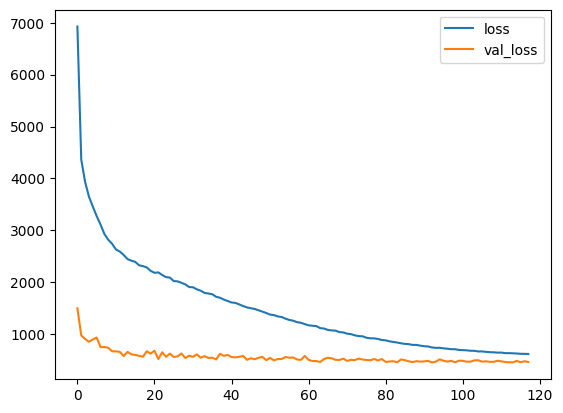

In [ ]:
# visualizing loss functions
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

# Testing the model

In [ ]:
predictions = model.predict(X_test)

476/476 [==============================] - 0s 828us/step


In [ ]:
mean_absolute_error(y_test,predictions), np.sqrt(mean_squared_error(y_test,predictions))

(16.056837702553374, 21.536503821650125)

In [ ]:
out = pd.DataFrame(predictions.round(),columns=['Predict'])
out['Actual']=y_test

In [ ]:
out.head(10)

,Predict,Actual
0,142.0,134
1,176.0,195
2,143.0,183
3,160.0,183
4,159.0,193
5,144.0,136
6,167.0,186
7,164.0,176
8,162.0,148
9,153.0,135
